# 2. hét / Prológus

A mari órán a következőkről lesz szó:
- Folytatjuk a Numpy-t: keresés a tömbökben, rendezés, minimum/maximum megtalálása. Tömbök összefűzése. (~ 10 perc)
- Grafikonok készítése, egy- és többváltozós függvények ábrázolása. (~ 40 perc)
- Függvények bevezetése (~ 20 perc)

# 2. hét / I. Numpy - Tömbműveletek

In [2]:
# Importáljuk a numpy libraryt!
import numpy as np

A programozás során általános feladat, hogy szeretnénk egy tömbbe beszúrni, kivenni, keresni elemeket. Elemeket hozzáadni tömbökhöz a `+` operátorral, vagy az egyszerű listák esetén az `.append(<elem>)` metódussal lehet, ekkor az újonnan felvett elem mindig a tömb végére kerül! Arra figyeljünk oda, hogy utóbbival egyszerre legfeljebb egy elemet tudunk hozzáadni ezen módon!

In [14]:
# Hozzuk létre a kezdeti tömböt!
A = np.array([2, 3, 5])
print(f"Az A tömb:{A} és típusa: {type(A)}")

A +=[4]
print(A)

A = np.append(A, [4, 5, 6])
print(A)

Az A tömb:[2 3 5] és típusa: <class 'numpy.ndarray'>
[6 7 9]
[6 7 9 4 5 6]


Ha a felhasználó által bekért adattal szeretnénk dolgozni, akkor az `input()` függvényt használjuk! Ez mindig `string`et fog eltárolni, ezért ha szeretnénk például számokkal dolgozni, akkor mindig a megfelelő typusra kell *castolnui a bekért adatot*!

**Példa**: fűzzünk hozzá egy tömbhöz egy felhasználó által bekért elemet!

In [5]:
# Hozzuk létre a kezdeti tömböt:
A = [2,5,3]

# Adjunk hozzá egy felhasználó által bekért elemet!
A.append(input())
print(A)        # Biztos ezt akartuk?

# Castoljuk intre az inputot!
A.append(int(input()))
print(A)

[2, 5, 3, '60']
[2, 5, 3, '60', 60]


Természetesen előfordulhat az is, hogy az elemeket nem sorfolytonosan szeretnénk hozzáfűzni egy tömbhöz, hanem például meglévő vektorokat vertikálisan *mátrixxá* összefűzni, vagy egy már meglévő mátrixot kiegészíteni. Erre a `.hstack()` és `.vstack()` (esetleg `.dstack()`) metódusok állnak rendelkezésre. Ennek megfelelően fűzzük össze az alábbi vektorrendszert egy mátrixxá!  
$$\mathcal{B}=\left\{\mathbf{v}_1=\begin{bmatrix} 4 \\ 2 \\ -1 \end{bmatrix},\mathbf{v}_2=\begin{bmatrix} -5 \\ 2 \\ 9 \end{bmatrix} ,\mathbf{v}_3=\begin{bmatrix}1 \\ -7 \\ 6 \end{bmatrix}\right\}$$
**Példa**: Vizsgáljuk meg, hogy *bázist alkot-e* $\mathcal{B}$ az $\mathbb{R}^3$ terén?

In [6]:
# Létrehozzuk a B halmaz elemeit:
v1 = np.array([[4],[2],[-1]])
v2 = np.array([[-5],[2],[9]])
v3 = np.array([[1],[-7],[6]])

# Fűzzük őket össze egy mátrixba!
A = np.hstack((v1,v2,v3))
print("A horizontálisan összefűzött mátrix:\n" + str(A))
B = np.vstack((v1.transpose(),v2.transpose(),v3.transpose()))
print("A vertikálisan összefűzött mátrix:\n" + str(B))

# Állapítsuk meg, hogy mennyi A determinánsa:
print("A mátrix determinánsa: " + str(np.linalg.det(A)))

A horizontálisan összefűzött mátrix:
[[ 4 -5  1]
 [ 2  2 -7]
 [-1  9  6]]
A vertikálisan összefűzött mátrix:
[[ 4  2 -1]
 [-5  2  9]
 [ 1 -7  6]]
A mátrix determinánsa: 345.00000000000017


<span style="color:teal"> *Megjegyzés: egy $\mathcal{B}$ vektorrendszer pontosan akkor alkot bázist egy tetszőleges $\mathcal{V}$ vektortéren, ha először is $\mathcal{B}$ elemei lineárisan függetlenek. Ezt tudjuk vizsgálni a determinánssal, ugyanis a $\det\mathbf{A}$ pontosan akkor lesz zérus, ha az $\mathbf{A}$ sorai/oszlopai lineárisan összefüggnek. Mivel a determináns nem zérus, ezért $\mathbf{v}_1,\mathbf{v}_2,\mathbf{v}_3$ lineárisan független kell, hogy legyen. A másik dolog amit garantálni kell, hogy $\mathcal{B}$ elemei kifeszítik a $\mathcal{V}$ teret. Mivel az $\mathbb{R}^n$ teret pontosan $n$ vektornak kell kifeszítenie, ezért ez a feltétel is teljesül; elvégre 3 vektorunk van.*  </span>

Ezt követően beszéljünk a tömbben való keresésről, és tömbök rendezéséről. Ha szeretnénk meghatározni egy tömb legkisebb/legnagyobb elemét, akkor a `.min()`, ileltve `.max()` metódusokkal egyszerűen megtehetjük ezt!

**Feladat**: Rendelkezésre áll egy tetszőleges mérés után egy $a_n$ adatsorunk. Keressük meg és írassuk ki, az adatsor legkisebb és legnagyobb elemét! Ezek alapján számoljuk ki a terjedelmét az adatoknak!
$$ \{a_n\}=\{2,83,-45,25,10,9,-57,120\}$$

In [7]:
# Definiáljuk a tömböt
a_n = np.array([[2,83,-45,25,10,9,-57,120]])

# Írjuk ki a minimumot és a maximumot!
print("Az a_n tömb legkisebb eleme: " + str(a_n.min()))
print("Az a_n tömb legnagyobb eleme: " + str(a_n.max()))

Az a_n tömb legkisebb eleme: -57
Az a_n tömb legnagyobb eleme: 120


**Feladat**: Írjuk ki az adathalmaz terjedelmét!
$$ R = \max\{a_n\}-\min\{a_n\}$$

In [8]:
# Az adathalmaz terjedelme:
R = a_n.max()-a_n.min()
print("Az adathalmaz terjedelme: " + str(R))  

Az adatsor terjedelme: 177


Persze megkönnyíthetjük a dolgunkat, ha rendezzük az adatsort, így könnyedén leolvashatóvá válik a minimum és a maximum! A programozásban kiemelt szerepet foglalnak el a *rendezési algoritmusok*, amelyek mögött egy bonyolult matematikai rendszer húzódik meg. Szerencsére az `np.sort(<adatsor>)` függvény segítségével könnyedén el tudjuk végeztetni "a piszkos munkát" a számítógéppel!

In [9]:
# Rendezzük és írassuk ki az a_n adatsort!
print(np.sort(a_n))

[[-57 -45   2   9  10  25  83 120]]


<span style="color:teal"> *Megjegyzés: a rendezési algoritmusok során a legnagyobb nehézséget mindig a számítási idő okozza. Az egyik legegyszerűbb eljárás a* **bubble sort**, *más néven a buborékrendezés. Ennek hátránya, hogy az elemek számával négyzetesen nő a futtatási ideje! Álljunk meg és gondoljuk át, hogy egészen pontosan mit is jelent ez! Az adathalmaz mennyisége, ha egy nagyságrendet ugrik, akkor közben a futási idő két nagyságrendet! Például, ha 10 helyett 1000 adatot szeretnék rendezni, akkor már 10000-szeresére nő az algoritmus futási ideje! A valós mérnöki problémák során viszont gyakran a több tíz és százmilliós nagyságrendű adathalmazokat vizsgálunk. Ezért az alapvető programozói gyakorlatban olyan algoritmusok terjedtek el, mint a:* **quicksort**, **merge sort**, **timsort**.</span>

# 2. hét / II. Plotolás

## Motiváció és alapok
A adat- és függvényábrázolás, vagy idegen szóval *plotolás*, egy igen központi feladata a mérnöki életnek (és a mérnöki munkát megelőző házi feladatoknak), nagyon sokszor előfordul, hogy valamilyen mennyiség alakulását például az térben/időben szeretnénk megmutatni, valamilyen függvénykapcsoaltot szeretnénk ábrázolni, vagy csak egyszerűen mérési eredményeket szeretnénk megjeleníteni, hogy ezt követően trendvonalat illeszzünk a pontokra. *(Hozzunk példákat erre!)*
Ki tudjuk-e találni, hogy az alábbi függvények milyen alakot vesznek fel?

Rezonanciagörbe *(Rezgéstan)*:
$$N(\lambda) = \dfrac{1}{\sqrt{(1-\lambda^2)^2+4\zeta^2\lambda^2}}$$

Legegyszerűbb (!) kéttárolós lengőrendszer: *(Mechatronika; Rendszer és Irányítástechnika)*
$$ y(t)=A_0\left[1-e^{-\zeta\omega_n t}\left(\cos(\omega_d t)+\dfrac{\zeta}{\sqrt{1-\zeta^2}}\sin(\omega_d t)\right)\right]$$

A hővezetési egyenlet megoldása: *(Hőtan, Termomechanika alapjai)*
$$ T(x,t) = \dfrac{1}{2\sqrt{\pi t}}e^{-\frac{x^2}{4t}}$$

<span style="color:teal"> *Megjegyzés: itt nem az az érdekes, hogy tudok olyan függvényeket mondani, amelyeket kapásból/előzetes ismeret nélkül nem tudunk ábrázolni, hanem az, hogy tudok ilyeneket mutatni ÉS ezek a mérnöki gyakorlatban gyakran előjönnek! Itt egy pillanatra álljunk meg és gondoljunk szegény tudósokra, akik még a Python előtt éltek...* </span>

Függvényeket tulajdonképpen úgy tudunk ábrázolni, hogy kiválasztunk valamilyen $[a,b]$ intervallumot, ahol szeretnénk megjeleníteni a függvényt. Ezután ezen intervallum belsejében kiválasztunk $n$ darab, *kellően sok* pontot, ahol kiszámítjuk a pontos értékeket. Ezt követően ezt a nagyon sok pontot egyenesekkel összekötjök és megkapjuk a grafikont! Ahhoz, hogy elkészítsük a pontokat a `np.linspace(a,b,n)` függvényt tudjuk használni. Ezt követően az egyes $x$ értékekre kiszámítjuk a függvényértékeket és ezt már a `plt.plot(<x>,<f(x)>)` függvény segítségével tudjuk ábrázolni!

**Feladat**: Ábrázoljuk az $f(x)=2\sin(3x+0.5)-4x+2$ függvényt a $[-4,6]\subset\mathbb{R}$ intervallumon!

In [10]:
import numpy as np
import matplotlib.pyplot as plt

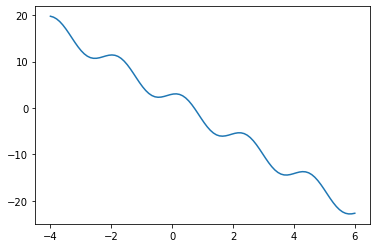

In [11]:
# Létrehozzuk linspace segítségével a pontokat!
x = np.linspace(-4,6,100)
# Kiszámítjuk a hozzátartozó függvényértékeket!
y = 2*np.sin(3*x+0.5)-4*x+2

# Ezt követően már tudjuk ábrázolni a függvényünket!
plt.plot(x,y)

Ha szeretnénk egy kicsit elegánsabbá tenni a plotot, akkor például tegyünk *tengelyfeliratokat*, adjunk *címet* a grafikonnak, a könnyebb leolvasás érdekében pedig készítsünk egy *grid*et! Ahhoz viszont, hogy ennyire belenyúljunk a plotolásba meg kell hívnunk a `fig, ax = plt.subplots()` függvényt, aholis az `ax` adattag *metódusaiként* érhetjük el ezeket a tulajdonságokat!

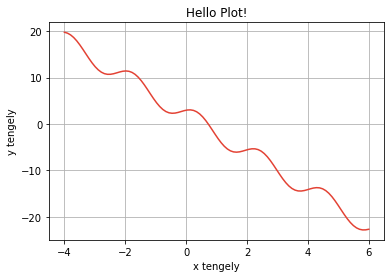

In [12]:
# Létrehozzuk linspace segítségével a pontokat!
x = np.linspace(-4,6,100)
# Kiszámítjuk a hozzátartozó függvényértékeket!
y = 2*np.sin(3*x+0.5)-4*x+2

# Hozzuk létre a 'rajzterületet'
fig, ax = plt.subplots()

# Mostmár testreszabhatjuk a plotot!
ax.plot(x,y,color="#e34234")
ax.set_xlabel("x tengely")      # Beállítjuk az x-tengely feliratot
ax.set_ylabel("y tengely")      # Beállítjuk az y-tengely feliratot
ax.set_title("Hello Plot!")     # Elnevezzük a plotot
ax.grid(True)                   # Bekapcsoljuk a gridet
plt.show()

## 1. feladat - Rezonanciagörbe
**Feladat**: Készítsük el a *rezonanciagörbét* $\zeta = 0.2$ esetén! 
$\begin{equation}N:[0,3]\subset\mathbb{R}\to\mathbb{R}\qquad\qquad N(\lambda) = \dfrac{1}{\sqrt{(1-\lambda^2)^2+4\zeta^2\lambda^2}}\end{equation}$
- A plot színe legyen <span style="color:chartreuse"> chartreuse </span>!
- A tengelyfeliratok legyenek: *Hangolás λ [-]* és *Nagyítás N [-]*!
- A grafikon neve: *Rezonanciagörbe*!
- Kapcsoljuk be a *grid*et!
- Keressük meg a függvény *maximum*át!

*+ Próbáljuk meg kiegészíteni a plotot $\zeta = \frac{\sqrt2}{2}$ és $\zeta = 1$ értékeivel is!*

A függvény maximuma: 2.5481318333947773


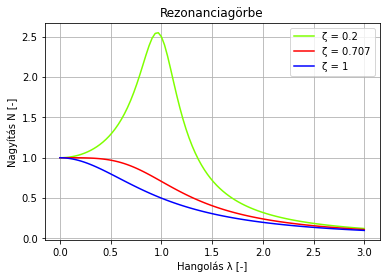

In [13]:
# Létrehozzuk linspace segítségével a pontokat!
λ = np.linspace(0,3,100)
# Kiszámítjuk a hozzátartozó függvényértékeket!
ζ = 0.2
N1 = 1/np.sqrt((1-λ**2)**2+4*ζ**2*λ**2)

# Meghatározzuk a .max() metódussal a maximumot!
print("A függvény maximuma: "+str(np.max(N1)))

# + Megcsináljuk a többi zeta értékre is:
ζ = np.sqrt(2)/2
N2 = 1/np.sqrt((1-λ**2)**2+4*ζ**2*λ**2)
ζ = 1
N3 = 1/np.sqrt((1-λ**2)**2+4*ζ**2*λ**2)

# Hozzuk létre a 'rajzterületet'!
fig, ax = plt.subplots()

# Plotolás és testreszabás
ax.plot(λ,N1,color="chartreuse",label="ζ = 0.2")
ax.plot(λ,N2,color="r",label="ζ = 0.707")
ax.plot(λ,N3,color="b",label="ζ = 1")
ax.set_xlabel("Hangolás λ [-]")      # Beállítjuk az x-tengely feliratot
ax.set_ylabel("Nagyítás N [-]")      # Beállítjuk az y-tengely feliratot
ax.set_title("Rezonanciagörbe")      # Elnevezzük a plotot
ax.grid(True)                        # Bekapcsoljuk a gridet!
ax.legend()                          # Bekapcsoljuk a legendet!
plt.show()

## Többváltozós függvények, felületek ábrázolása

Az első pont, ahová ki fogjuk terjeszteni a plotolási tudásunkat, az a *kétváltozós függvény*ek és *felület*ek ábrázolása! Alapvetően nem bonyolutabb itt sem a dolgunk, mindösszességében nem csak az *x-tengely* mentén, hanem egy *x-y* területen kell meghatározunk a függvény pontjait. Ehhez az `np.meshgrid(<X>,<Y>)` függvényt fogjuk használni. Ezt követően az `ax.plot_surface(<X>,<Y>,<f(x,y)>)` függvény segítségével elő is áll a felületünk.

**Példa**: Nézzünk meg egy példát és ábrázoljuk az alábbi függvényt:
$$ f:[-2,5]\times [-3,4]\subset\mathbb{R}^2 \to \mathbb{R} \qquad\qquad f(x,y) = \dfrac{1}{2}x^2y-y$$

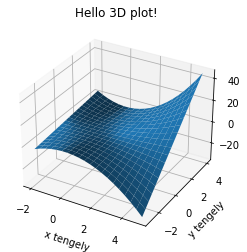

In [14]:
# Létrehozzuk az alappontokat:
x = np.linspace(-2,5,20)
y = np.linspace(-3,4,20)

# Ezek segítségével lefedjük a területet:
x,y = np.meshgrid(x,y)

# A grid felett definiáljuk a függvényt:
f = x**2*y/2-y

# Ábárzoljuk a függvényt:
fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(x,y,f)
ax.set_xlabel("x tengely")
ax.set_ylabel("y tengely")
ax.set_title("Hello 3D plot!")
plt.show()

## 2. feladat - A hővezetési egyenlet megoldása
**Feladat**: Ábrázoljuk a hővezetési egyenlet megoldását!
$$ \begin{equation}T:[-3,3]\times[0,10]\subset\mathbb{R}^2\to\mathbb{R}\qquad\qquad T(x,t)=\dfrac{1}{2\sqrt{\pi t}}e^{-\frac{x^2}{4t}} \tag{2} \end{equation}$$
- (Praktikusan plotolásnál: t,x,T legyen a sorrend)
- A tengelyfeliratok legyenek: *idő t[s]* és *pozíció x[m]*
- A diagramcím legyen: *A hővezetési egyenlet megoldása*

C:\Users\mbenc\AppData\Local\Temp\ipykernel_17076\2374565266.py:13: RuntimeWarning: divide by zero encountered in divide
  T = 1/(2*np.sqrt(np.pi*t))*np.exp(-x**2/(4*t))
C:\Users\mbenc\AppData\Local\Temp\ipykernel_17076\2374565266.py:13: RuntimeWarning: invalid value encountered in multiply
  T = 1/(2*np.sqrt(np.pi*t))*np.exp(-x**2/(4*t))


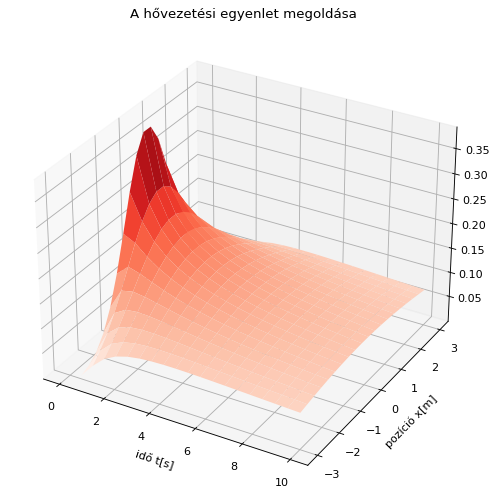

In [15]:
# Dekorációs elem
from matplotlib import cm
plt.style.use('_mpl-gallery')

# Létrehozzuk az alappontokat:
x = np.linspace(-3,3,20)
t = np.linspace(0,10,20)

# Ezek segítségével lefedjük a területet:
x,t = np.meshgrid(x,t)

# A grid felett definiáljuk a függvényt:
T = 1/(2*np.sqrt(np.pi*t))*np.exp(-x**2/(4*t))

# Ábárzoljuk a függvényt:
fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(t,x,T, cmap = cm.Reds)
ax.set_xlabel("idő t[s]")
ax.set_ylabel("pozíció x[m]")
ax.set_title("A hővezetési egyenlet megoldása")

# Átméretezzük a plotot
fig.set_size_inches(10,6)
fig.set_dpi(80)

plt.show()

# Mentsük el a szép plotunkat!
fig.savefig('hovezetes.jpg',dpi=300)

<span style="color:teal"> *A második pont, ahová majd kiterjesztjük a plotolási tudásunkat majd kiderül a 8-9. heti gyakorlaton...* </span>

# 2. hét / III. Függvények

## Bevezetés, szintaktika

A *függvény*eket célszerű a programozásban is hasonlóan bevezetni, mint azt matematikában tesszük. Analízis ismereteinkből kiindulva valamiféle **hozzárendelés**ként képzeljük most el a függvényeket: például valós számokhoz rendelhetek valós számokat, de akár vektorokat is, illetve vektorokhoz is tudunk rendelni skalár számokat, és természetesen vektorokat is.

Programozás során is praktikusan ezt kell elképzelni azzal a különbséggel, hogy amikor azt mondom, hogy *skalárhoz skalárt rendelek*, igazából egy `int` típusú változóhoz rendelek egy másik `int` típusú változót. Természetesen `int`,`float`,`string`,`list`,`bool`... változókkal is működik ugyanez, ha úgy tartja kedvünk. Néhány példa:
- Egy valós számhoz (`float`) hozzárendeljük a kétszeresét (`float`)
- Egy egész számhoz (`int`) hozzárendeljük az osztóinak listáját (`list`)
- Egy tetszőleges szóhoz (`string`) hozzárendeljük a karaktereinek számát (`int`)
- Egy cikkhez (`string`) hozzárendeljük a kivonatot (`string`)
- De akár egy plothoz (`Figure`) is hozzárendelhetünk egy hivatkozást (`string`)

A Pythonban ennek szintaktikája a következő módon néz ki:
```
def <név>(<paraméterek>):
    <hozzárendelési szabályok>
    ...
    return <visszatérési érték>
```
Ekkor azt mondhatjuk, hogy a `<név>` függvény a `<paraméterek>`hez rendeli a `<visszatérési érték>`et a `<hozzárendelési szabályok>` alapján. Nézzük meg egy konkrét példán keresztül is ezt! Írjuk meg a `pelda(a)` függvényt, amely bekér egy `a` számot és visszaadja annak háromszorosánál kettővel nagyobb számot!

In [16]:
# Definiáljunk egy függvényt:
def pelda(a):
    return 3*a+2

# Próbáljuk ki néhány számra
print(pelda(5))
print(pelda(77))
print(pelda(-2))

17
233
-4


**Példa**: Írjuk egy `masodfoku(a,b,c)` függvényt, amely megoldja az:
$$ ax^2+bx+c = 0$$
alakú, másodfokú egyenletet! A visszatérési érték legyen egy `string`! Mi a megoldása az $x^2+2x=0$ egyenletnek?

In [17]:
# Definiáljuk a függvényt!
def masodfoku(a,b,c):
    # Megoldóképlet alapján az egyik gyök
    x1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
    # Másik gyök
    x2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
    # Térjünk vissza egy stringgel, amivel kiiratjuk a megoldást!
    return "Az egyenlet megoldásai: x_1 = " + str(x1) + " és x_2 = " + str(x2)

masodfoku(1,2,0)

'Az egyenlet megoldásai: x_1 = 0.0 és x_2 = -2.0'

**Feladat**: Írjunk egy `atlag(a,b)` függvényt, amely visszaadja az `a` és `b` számok számtani átlagát! *(Mik lesznek a paraméterek és mi lesz a visszatérési érték?)*

In [18]:
# Definiáljuk a függvényt
def atlag(a,b):
    # Kiszámítjuk az átlagot
    return (a+b)/2

print(atlag(6,8))
print(atlag(-5,12))

7.0
3.5


## 3. feladat: Fejes Csapszeg
**Feladat**: Adott egy fejes csapszeg, amit egy egyenes körhengerrel modellezünk! Készítsünk egy `tomeg(d,h)` függvényt, amely egy felhasználó által bekért `d` átmérő [mm] és egy `h` magasság [mm] függvényében meghatározza a `ρ=7800` [kg/m^3] sűrűségű gyorsacélból készült alkatrész *tömeg*ét! A szükséges egyenletetk *SI*-ben:
$$ V = \dfrac{d^2\pi}{4}\cdot h \qquad\qquad m = \rho V$$

In [19]:
ρ = 7800
# Definiáljuk a függvényt
def tomeg(d,h):
    V = d**2*np.pi*h/4
    m = ρ*V
    return m

# Bekérjük az adatokat, figyelve a dimenziókra!
d = float(input("Adja meg a csapszeg átmérőjét [mm]-ben! "))/1000
h = float(input("Adja meg a csapszeg magasságát [mm]-ben! "))/1000

print("A fejes csapszeg tömege: " + str(round(tomeg(d,h),2)) + " [kg]")

A fejes csapszeg tömege: 5.29 [kg]


# 2.hét / Epilógus

### Hasznos anyagok:

- Dokumentációk
    - Python hivatalos dokumentációja: https://docs.python.org/3/
    - [PEP 8](https://peps.python.org/pep-0008/) Style Guide for Python Code - Melyek a jó és rossz programozási praktikák
    - NumPy hivatalos dokumentációja: https://numpy.org/doc/1.25/
- Tankönyvek
    - [Dive Into Python 3](http://diveintopython3.problemsolving.io/)
    - [Dive into Deep Learning](https://d2l.ai/) - Interaktív tankönyv Deep Learninghez
    - [Fluent Python: Clear, Concise, and Effective Programming by Luciano Ramalho](https://www.oreilly.com/library/view/fluent-python/9781491946237/) - Haladóbb szemléletű Python programozás
- Útmutatók
    - [The Official Python Tutorial](https://docs.python.org/3/tutorial/) - Self-explanatory?
    - [Foglalt Keyword lista](https://docs.python.org/3.0/reference/lexical_analysis.html#id8) - Ezeket ne használd változónévnek!
    - [Codecademy](https://www.codecademy.com/catalog) - Interaktív (fizetős) online tutorial
    - [CheckIO](https://py.checkio.org/) - Tanulj Pythont játékfejlesztésen kersztül
- Competitive Programming
    - [Codewars](https://www.codewars.com/?language=python)
    - [CodeForces](https://codeforces.com/)

### Elérhetőség

Bármilyen kérdés, kérés vagy probléma esetén keressetek minket az alábbi elérhetőségeken:
- Monori Bence - m.bence02@outlook.hu
- Wenesz Dominik - weneszdominik@gmail.com

Illetve anonim üzenetküldésre is lehetőséget biztosítunk, ezt az alábbi linken tudjátok elérni: https://forms.gle/6VtGvhja3gq6CTT66